<img src="http://escolar.itam.mx/centro_tesis/img/logo-ITAM.png" style="width:250px">
# Machine Learning

## Incremental linear regression
Tarea 4 : Gustavo Augusto Mondragón Sánchez : 136894

### Introducción:

Una desventaja de los modelos anteriores de regresión lineal es que a medida que adquirimos más información, si deseamos actualizar el modelo, es obligatorio volver a computar todo el algoritmo de la regresión lineal. 
Sin embargo, existen métodos de aprendizaje incremental, es decir que se pueden modificar agregando pequeñas porciones de información sin necesidad de computar todo de nuevo.
Una ventaja de estos es que permiten incorporar nueva información, pero también determinar el peso de la información si es más o menos nueva. 

#### Stochastic Gradient Descent (SGD):
Es una aproximación estocástica del método de optimización del gradiente descendente para minimizar una función que es suma de otras funciones diferenciables. Es decir, intenta encontrar el mínimo o máximo mediante iteraciones.
El pseudocódigo para implementar SGD es el siguiente:
* Elige un vector aleatorio de parámetros $w$ y una tasa de aprendizaje $η$
* Repetir hasta que se obtiene un mínimo aproximado:
  * De manera aleatoria elige ejemplos de el set de entrenamiento.
  * Para cada $i=1, 2, ..., n$ haz:
    * $w := w - η∇Q_i(w)$
    
Ventajas:
* Eficiencia
* Fácil de implementar
* Bueno para grandes escalas de datos

#### Least Mean Squares (LMS)
Originalmente formulado por Widrow y Hoff, LMS es una clase de filtro adaptativo usado para encontrar los coeficientes que produzcan el mínimo cuadrado medio de la señal de error (la diferencia entre la señal deseada y la calculada). Es un filtro adaptativo ya que sólo se basa en el error calculado a cada momento. 

La idea principal de LMS es aproximar los pesos óptimos $R^-1P$ actualizando los pesos de manera que la función pueda converger. Está basado en el método del Gradiente Descendente. 
El algoritmo comienza asumiendo pesos pequeños (incluso cero a veces) y a cada paso se encuentra el gradiente del mean square error, luego los pesos se actualizan.
La función para actualizar los pesos es la siguiente:
$$W_{n+1} = W_n - η∇ε[n]$$
donde $ε$ representa el mean-square error y η el coeficiente de convergencia.

[Sklearn, SGD](http://scikit-learn.org/stable/modules/sgd.html)
[Wikipedia, SGD](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
[National Instruments](http://zone.ni.com/reference/en-XX/help/372357A-01/lvaftconcepts/aft_lms_algorithms/)
[Wikipedia, LMS](https://en.wikipedia.org/wiki/Least_mean_squares_filter)


### Objetivo:
* Implementar el algoritmo iterativo incremental para calcular una regresión lineal.
* Probar LMS con una tasa de 0.05.
* Graficar el progreso del error.
* Estandarizar los datos y repetir el experimento con una tasa de 0.1 y 1

In [11]:
#Librerías necesarias:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Estructura de los datos:
* 1029 registros.
* Una variable dependiente continua Y
* Una variable independiente continua X

In [12]:
#Cargar los datos desde repositorio online:
data = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
data.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


### División del conjunto de datos en entrenamiento y validación

In [13]:
np.random.seed(12345)     #Para revisiones de los resultados futuras

#División de los datos 
trainx, testx, trainy, testy = train_test_split(data[data.columns[0:-1]],data[data.columns[-1]], train_size=0.75)
#Datos estandarizados
scaler = preprocessing.StandardScaler().fit(trainx)
trainxE=scaler.transform(trainx)
testxE=scaler.transform(testx)

### Creación del modelo LMS:

In [14]:
def LMS(x,y,eta):
    x = np.insert(np.array(x), 0, 1, axis=1)
    y = np.array(y)
    nr = x.shape[0]
    nc = x.shape[1]
    w = np.random.random((1,nc))
    err = []
    for i in range(0,nr):
        e = np.sum(y[i] - (np.dot(x[i],w.T)))*x[i]
        w = w + eta*e
        err.append(e)
    err = np.array(err)
    
    print 'Ordenada: %f, Pendiente: %f' % (w[0,0], w[0,1])
    
    print "Progreso del error:"
    plt.scatter(range(0,nr),err[:,1], color='black')
    plt.plot(range(0,nr),err[:,1], color='blue')
    plt.show()
    
    return w

def testLMS(x,y,w):
    plt.scatter(x,y, color='black')
    pred = w[0,0] + w[0,1]*x
    plt.scatter(x,pred, color='blue')
    ecm = (1.0/len(y))*np.abs(np.sum(np.array(y)-pred))
    print 'Error medio: %f' % ecm
    plt.show()


### Pruebas del modelo: eta = 0.0001

Ordenada: 2.502901, Pendiente: 1.929057
Progreso del error:


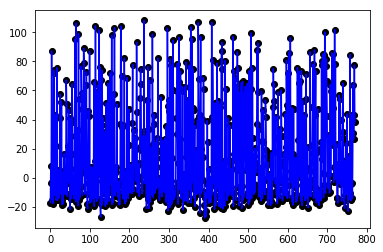

Error medio: 7829.157372


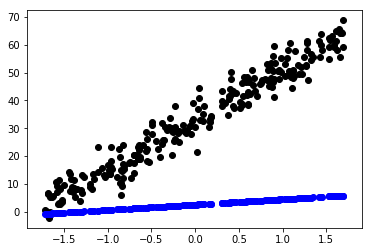

In [15]:
w = LMS(trainxE,trainy,0.0001)
testLMS(testxE,testy,w)

### Pruebas del modelo: eta = 0.001

Ordenada: 18.162177, Pendiente: 9.698791
Progreso del error:


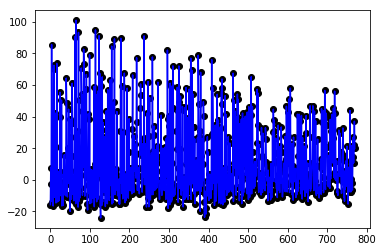

Error medio: 3799.310371


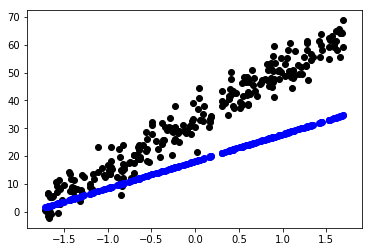

In [16]:
w = LMS(trainxE,trainy,0.001)
testLMS(testxE,testy,w)

### Pruebas del modelo: eta = 0.01

Ordenada: 32.863086, Pendiente: 17.308201
Progreso del error:


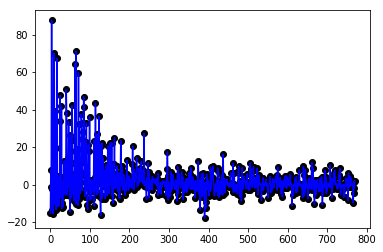

Error medio: 16.510521


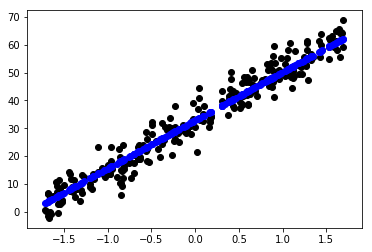

In [17]:
w = LMS(trainxE,trainy,0.01)
testLMS(testxE,testy,w)

### Pruebas del modelo: eta = 0.05

Ordenada: 32.380573, Pendiente: 17.163193
Progreso del error:


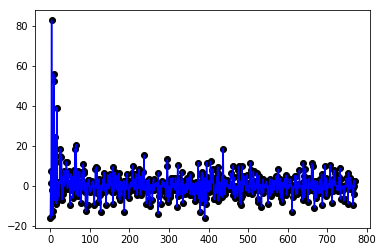

Error medio: 140.807673


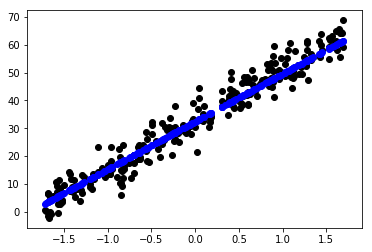

In [18]:
w = LMS(trainxE,trainy,0.05)
testLMS(testxE,testy,w)

### Pruebas del modelo: eta = 0.1

Ordenada: 32.294041, Pendiente: 17.118023
Progreso del error:


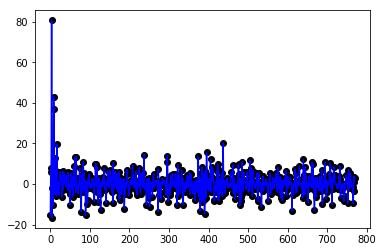

Error medio: 163.073421


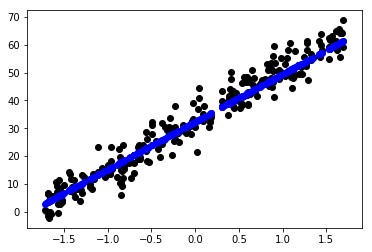

In [19]:
w = LMS(trainxE,trainy,0.1)
testLMS(testxE,testy,w)

### Pruebas del modelo: eta = 1

Ordenada: 55.499551, Pendiente: 31.571672
Progreso del error:


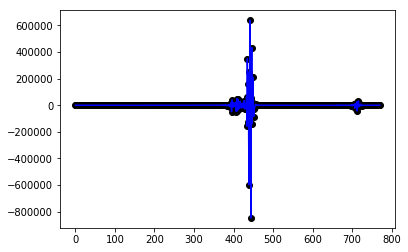

Error medio: 5804.887700


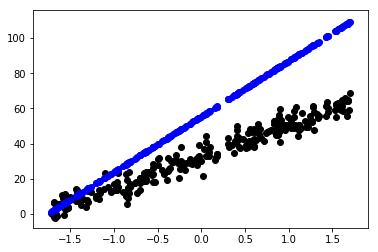

In [20]:
w = LMS(trainxE,trainy,1)
testLMS(testxE,testy,w)

## Conclusiones

Se puede apreciar como la elección de una eta correcta minimiza el error y hace que los coeficientes convergan más rápido.
Si es demasiado pequeña o demasiado grande ni siquiera logrará encontrar coeficientes que se aproximen al valor correcto, mientras que si es del tamaño indicado encuentra muy buenos estimadores.